In [1]:
from dataclasses import dataclass
import csv

import click    
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 


# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 


In [2]:
 num_actions = 3
 i=100
 while i < 100:
   action = random.randint(0,num_actions-1) 
   print(action)
   i = i-1

In [3]:
connection = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="senha"
    )
curriculo ="testeNovoAcerto2xSetupPercentual93cenarisdqn3cenarios01_01122023_0156_epsod_%"
stmt = f"SELECT replace(SUBSTR (curriculo,LENGTH(curriculo)-7,9 ),'_e','e') epsodio,  porcentagem curriculo, count(porcentagem) qtd FROM \"Curriculos\" where curriculo like '{curriculo}_%' GROUP BY curriculo,porcentagem   order by cast(replace(SUBSTR (curriculo,LENGTH(curriculo)-1,2 ),'_','') as INTEGER), porcentagem" 

data = sqlio.read_sql_query(stmt, connection)

C:\Users\MArcelo\AppData\Local\Temp\ipykernel_15036\2362547665.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


In [4]:
data = sqlio.read_sql_query(stmt, connection)
    # Now data is a pandas dataframe having the results of above query.
data.head()


C:\Users\MArcelo\AppData\Local\Temp\ipykernel_15036\3497097882.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


,epsodio,curriculo,qtd
0,epsod_0,"0.1,0.1,0.1,1,1",8
1,epsod_0,"1,1,1,0.1,0.1",8
2,epsod_0,"1,1,1,1,1",15
3,epsod_1,"0.1,0.1,0.1,1,1",6
4,epsod_1,"1,1,1,0.1,0.1",6


In [5]:
len(data)


39

In [6]:
def remove(epsodio):
  return epsodio[-2:].replace("_","")
  
data1 = data 
data1['ep'] = data['epsodio'].apply(remove)
data1 = data1.drop('epsodio', axis=1)
print(data1)

          curriculo  qtd  ep
0   0.1,0.1,0.1,1,1    8   0
1     1,1,1,0.1,0.1    8   0
2         1,1,1,1,1   15   0
3   0.1,0.1,0.1,1,1    6   1
4     1,1,1,0.1,0.1    6   1
5         1,1,1,1,1   21   1
6   0.1,0.1,0.1,1,1    6   2
7     1,1,1,0.1,0.1    4   2
8         1,1,1,1,1   25   2
9   0.1,0.1,0.1,1,1   11   3
10    1,1,1,0.1,0.1    4   3
11        1,1,1,1,1   10   3
12  0.1,0.1,0.1,1,1    6   4
13    1,1,1,0.1,0.1    7   4
14        1,1,1,1,1   20   4
15  0.1,0.1,0.1,1,1    5   5
16    1,1,1,0.1,0.1    2   5
17        1,1,1,1,1   24   5
18  0.1,0.1,0.1,1,1    2   6
19    1,1,1,0.1,0.1    7   6
20        1,1,1,1,1   26   6
21  0.1,0.1,0.1,1,1    2   7
22    1,1,1,0.1,0.1    7   7
23        1,1,1,1,1   26   7
24    1,1,1,0.1,0.1    7   8
25        1,1,1,1,1   28   8
26  0.1,0.1,0.1,1,1    2   9
27    1,1,1,0.1,0.1    3   9
28        1,1,1,1,1   30   9
29    1,1,1,0.1,0.1    5  10
30        1,1,1,1,1   30  10
31    1,1,1,0.1,0.1    5  11
32        1,1,1,1,1   30  11
33    1,1,1,0.

In [7]:




epsodios = data1.pivot(columns=['curriculo'],index='ep').sort_values(by="ep")
epsodios.head()

qtd                        
curriculo 0.1,0.1,0.1,1,1 1,1,1,0.1,0.1 1,1,1,1,1
ep                                               
0                     8.0           8.0      15.0
1                     6.0           6.0      21.0
10                    NaN           5.0      30.0
11                    NaN           5.0      30.0
12                    NaN           5.0      30.0

In [8]:
data3 = data 
data3['ep'] = data['epsodio'].apply(remove)
data3 = data3.drop('epsodio', axis=1)
print(data3)

          curriculo  qtd  ep
0   0.1,0.1,0.1,1,1    8   0
1     1,1,1,0.1,0.1    8   0
2         1,1,1,1,1   15   0
3   0.1,0.1,0.1,1,1    6   1
4     1,1,1,0.1,0.1    6   1
5         1,1,1,1,1   21   1
6   0.1,0.1,0.1,1,1    6   2
7     1,1,1,0.1,0.1    4   2
8         1,1,1,1,1   25   2
9   0.1,0.1,0.1,1,1   11   3
10    1,1,1,0.1,0.1    4   3
11        1,1,1,1,1   10   3
12  0.1,0.1,0.1,1,1    6   4
13    1,1,1,0.1,0.1    7   4
14        1,1,1,1,1   20   4
15  0.1,0.1,0.1,1,1    5   5
16    1,1,1,0.1,0.1    2   5
17        1,1,1,1,1   24   5
18  0.1,0.1,0.1,1,1    2   6
19    1,1,1,0.1,0.1    7   6
20        1,1,1,1,1   26   6
21  0.1,0.1,0.1,1,1    2   7
22    1,1,1,0.1,0.1    7   7
23        1,1,1,1,1   26   7
24    1,1,1,0.1,0.1    7   8
25        1,1,1,1,1   28   8
26  0.1,0.1,0.1,1,1    2   9
27    1,1,1,0.1,0.1    3   9
28        1,1,1,1,1   30   9
29    1,1,1,0.1,0.1    5  10
30        1,1,1,1,1   30  10
31    1,1,1,0.1,0.1    5  11
32        1,1,1,1,1   30  11
33    1,1,1,0.

In [9]:
data3 = data3.astype({'ep':'int'})
teste = data3.pivot(columns=['curriculo'],index='ep')
teste
#grup = data3.groupby(['ep','curriculo']).sum()
#grup

#grup = teste.groupby('ep')('0.1,0.1,0.1,1,1').sum()
#,'0.5,0.5,0.5,1,1','0.8,0.8,0.8,1,1','1,1,1,0.1,0.1','1,1,1,1,1')].sum()
#grup


qtd                        
curriculo 0.1,0.1,0.1,1,1 1,1,1,0.1,0.1 1,1,1,1,1
ep                                               
0                     8.0           8.0      15.0
1                     6.0           6.0      21.0
2                     6.0           4.0      25.0
3                    11.0           4.0      10.0
4                     6.0           7.0      20.0
5                     5.0           2.0      24.0
6                     2.0           7.0      26.0
7                     2.0           7.0      26.0
8                     NaN           7.0      28.0
9                     2.0           3.0      30.0
10                    NaN           5.0      30.0
11                    NaN           5.0      30.0
12                    NaN           5.0      30.0
13                    NaN           3.0      32.0
14                    NaN           3.0      32.0

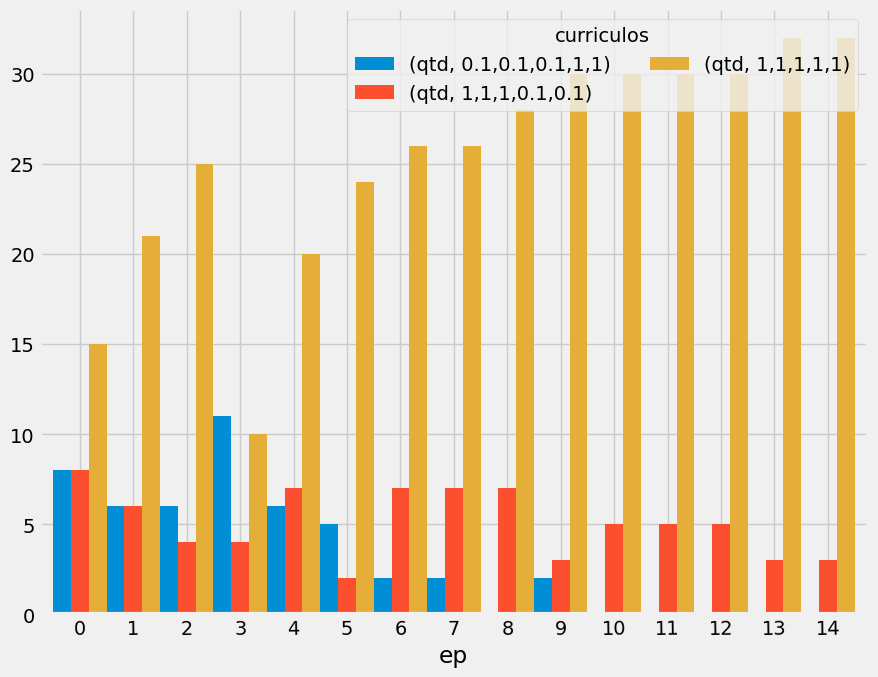

In [10]:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
teste.plot(kind="bar",ax=ax ,width = 1,figsize=(9,7),rot=1)
fig.tight_layout()
handles, labels = ax.get_legend_handles_labels()
# reverse to keep order consistent
ax.legend(loc='upper right',ncol=2,title="curriculos")


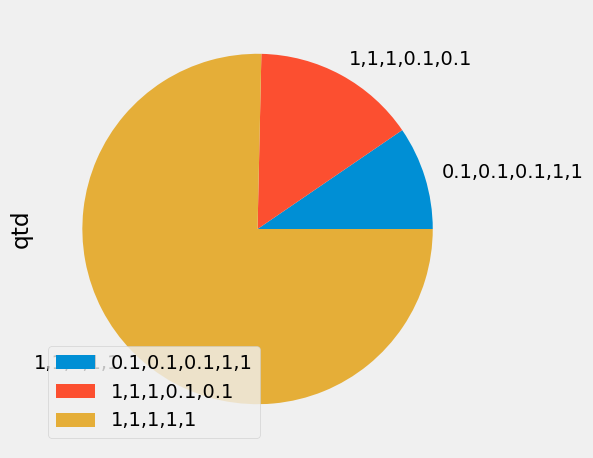

In [11]:
grup = data3.drop('ep', axis=1)
grup = grup.groupby(['curriculo']).sum()
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

grup.plot.pie(subplots=True, ax=ax ,figsize=(11, 6))



fig.tight_layout()
handles, labels = ax.get_legend_handles_labels()


C:\Users\MArcelo\AppData\Local\Temp\ipykernel_15036\414466123.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


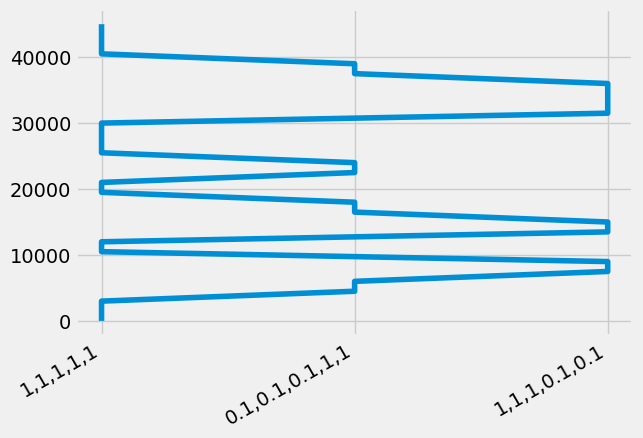

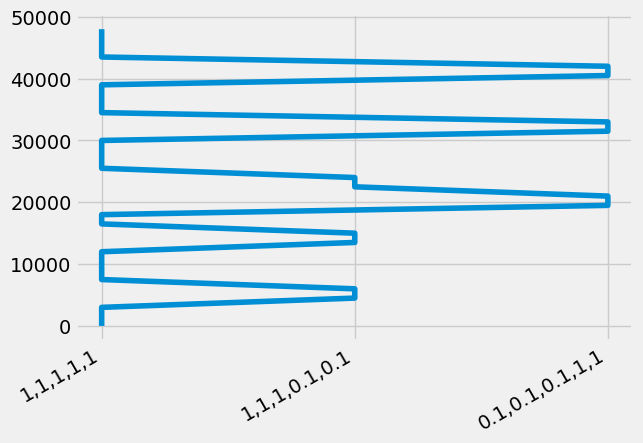

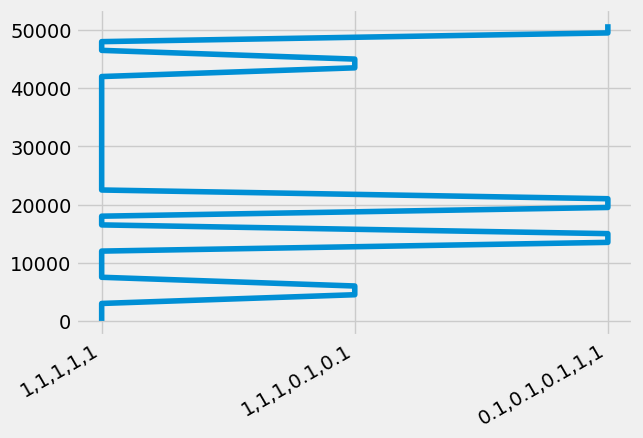

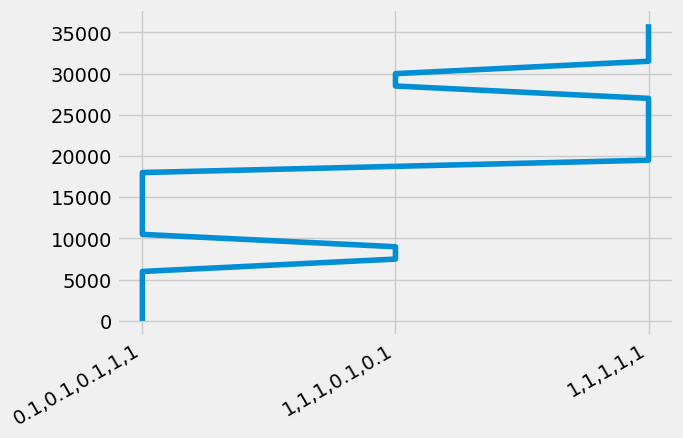

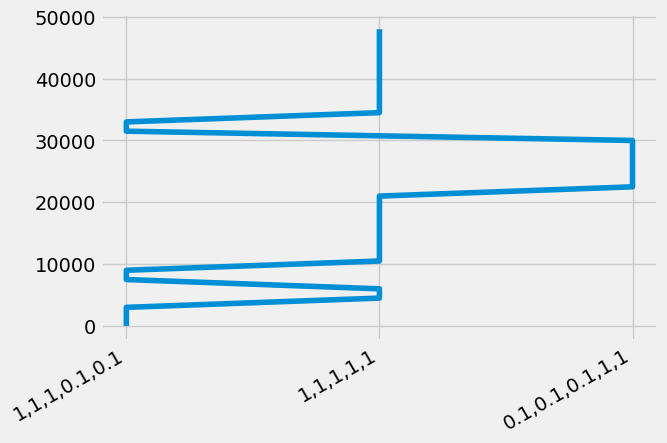

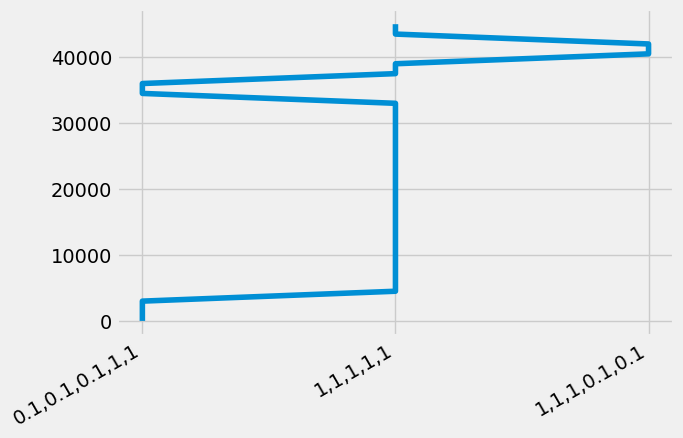

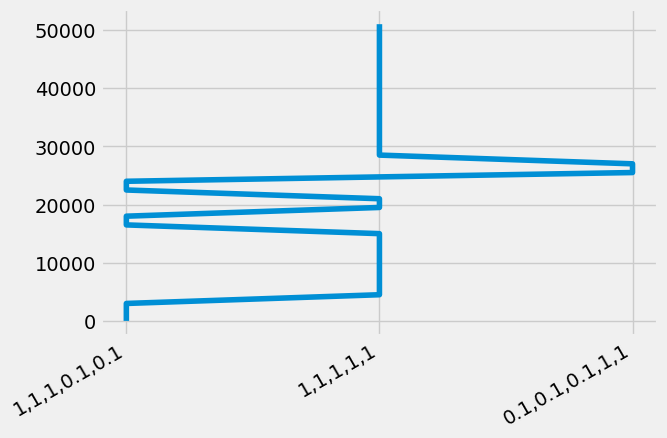

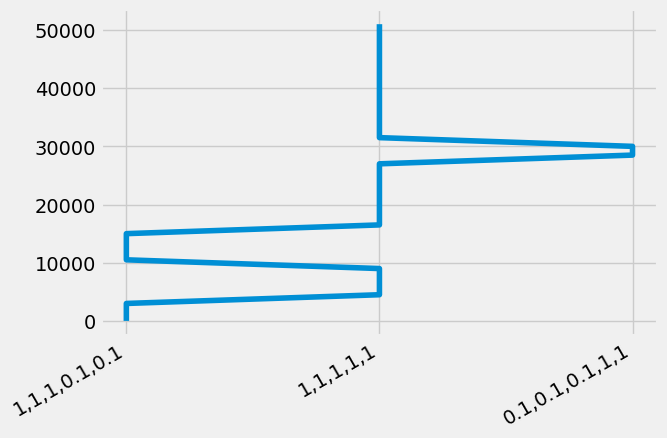

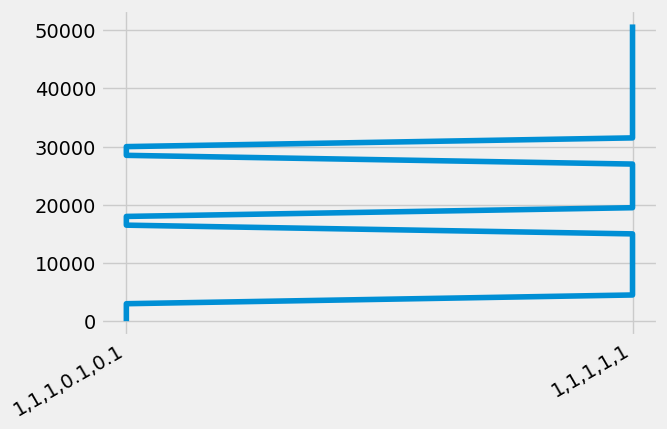

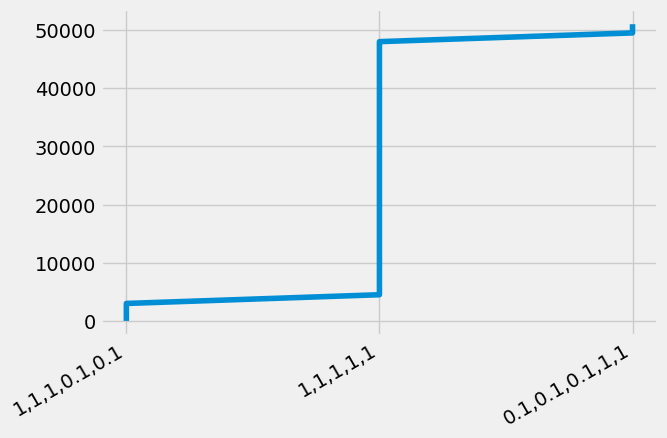

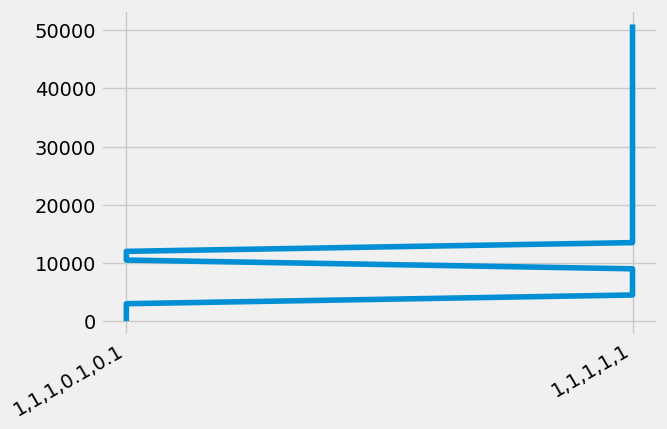

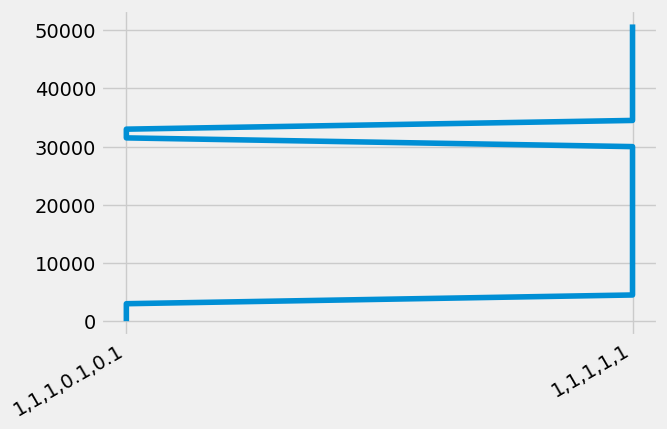

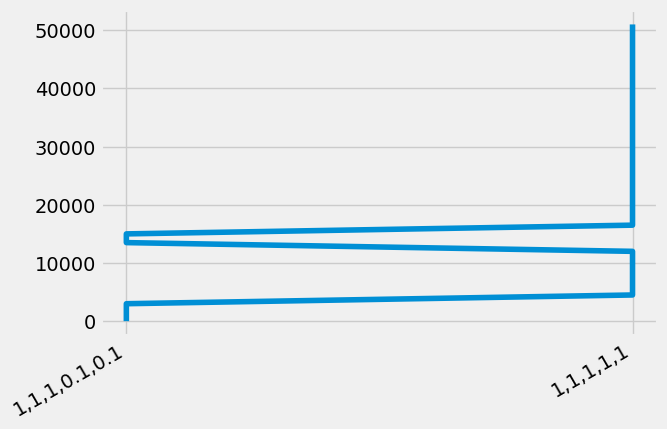

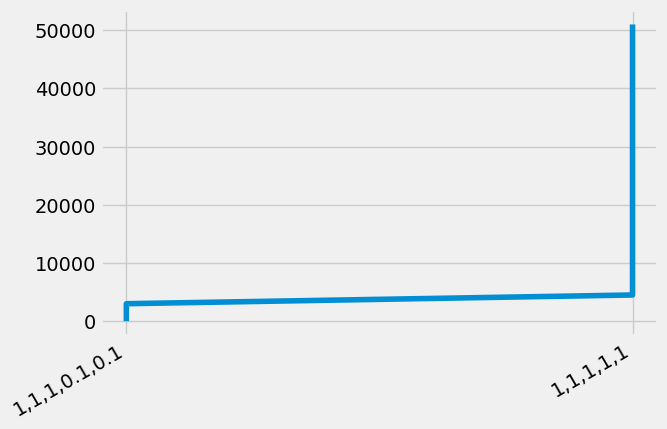

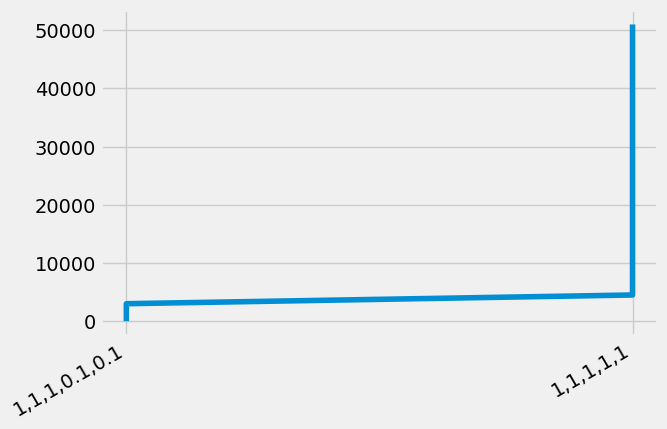

In [12]:

stmt = f"select passo,curriculo,accuracy_treinamento,accuracy_teste,acuracy_questao_0,acuracy_questao_1,acuracy_questao_2,acuracy_questao_3,acuracy_questao_4,porcentagem,acao,tipoescolha FROM \"Curriculos\" where curriculo like '{curriculo}_%' order by cast(replace(SUBSTR (curriculo,LENGTH(curriculo)-1,2 ),'_','') as INTEGER), passo" 

data = sqlio.read_sql_query(stmt, connection)
data1 = data 
data1['ep'] = data['curriculo'].apply(remove)
data1 = data1.drop('curriculo', axis=1)
data1 = data1.drop('accuracy_treinamento', axis=1)
data1 = data1.drop('accuracy_teste', axis=1)
data1 = data1.drop('acao', axis=1)
data1 = data1.drop('tipoescolha', axis=1)
data1 = data1.astype({'ep':'int'}) 

data1 = data1.astype({'passo':'int'}) 

data1
teste = data1['ep'].unique()
teste
for i in teste: 
    dataEp0 = data1.loc[data1['ep'] ==i ]
    fig, ax = plt.subplots()
    ax.plot( dataEp0['porcentagem'],dataEp0['passo'])
    fig.autofmt_xdate()


#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
#fig.autofmt_xdate()
#while  i <= 0 

#dataEp0 = data1.loc[data1['ep'] ==0 ]
#fig, ax = plt.subplots()
   

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)
#fig.autofmt_xdate()

C:\Users\MArcelo\AppData\Local\Temp\ipykernel_15036\3281676874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


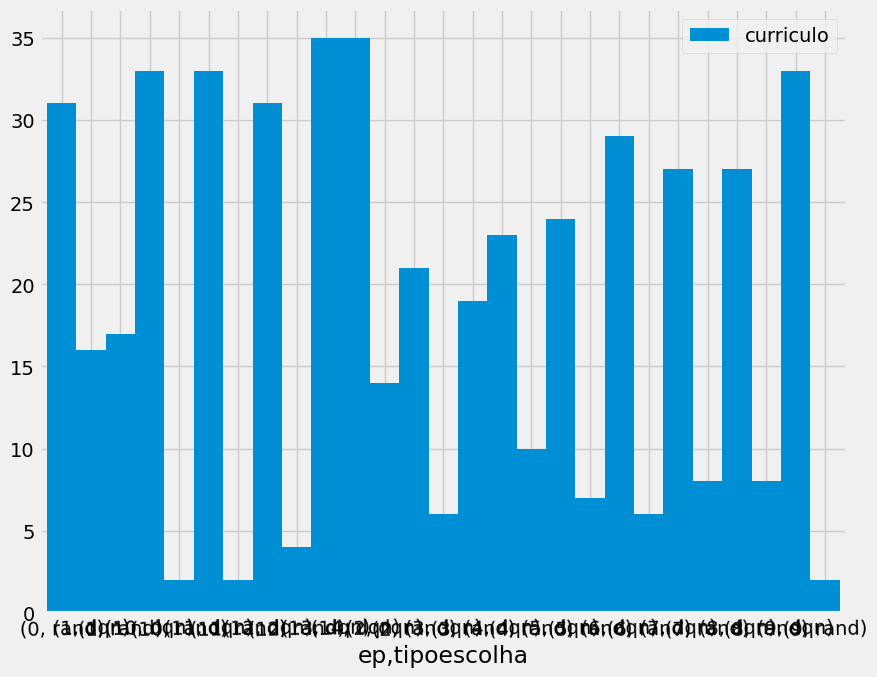

In [13]:
stmt = f"select curriculo,tipoescolha FROM \"Curriculos\" where curriculo like '{curriculo}_%' order by cast(replace(SUBSTR (curriculo,LENGTH(curriculo)-1,2 ),'_','') as INTEGER), passo" 
data = sqlio.read_sql_query(stmt, connection)
data['ep'] = data['curriculo'].apply(remove)
#data1 =  data1.drop('curriculo', axis=1)
data = data.groupby(["ep","tipoescolha"]).count()
fig, ax = plt.subplots()

data.plot(kind="bar",ax=ax ,width = 1,figsize=(9,7),rot=1)


fig.tight_layout()
